In [1]:
%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import axes3d

In [2]:
def Metropolis( f, d = 2, NSteps = int(1e5), delta = 1.0 ):
    
    x = np.zeros( (NSteps, d) )
    
    for i in tqdm(range(1,NSteps)):
        
        x[i,:] = x[i-1,:] + (np.random.random(d)-0.5)*delta
        
        present = f( x[i-1,:] )
        future = f( x[i,:] )
        
        # probabilidad de aceptacion
        alpha = np.minimum(1., future/present)
        
        g = np.random.rand()
        
        if g < alpha:
            x[i,:] = x[i,:]
        else:
            x[i,:] = x[i-1,:]
            
    return x

In [3]:
def g(x):
    r = np.sqrt( np.sum( x**2 ) )
    return np.exp( -r**2 )

In [4]:
x = Metropolis( g, d=3 )

100%|██████████| 99999/99999 [00:02<00:00, 37575.82it/s]


In [5]:
def Normalization( d = 2, sigma = 1/np.sqrt(2)):
    return np.sqrt( (2.0*np.pi*sigma**2)**d )

In [6]:
def f(x):
    r = np.sqrt( np.sum(x*x, axis=1  ))
    return np.cos(r)

In [7]:
def GetIntegral(d = 2):
    
    x = Metropolis(g,d=d)
    Sample = f(x)
    mean = np.average( Sample )
    mean *= Normalization(d=d)
    
    return mean

In [8]:
GetIntegral(d=2)

100%|██████████| 99999/99999 [00:02<00:00, 39712.13it/s]


1.8118672840038161

In [9]:
GetIntegral(d=3)

100%|██████████| 99999/99999 [00:02<00:00, 39753.51it/s]


2.1396407756579645

In [12]:
def Electron(x):
    r = np.sqrt( np.sum( x**2 ) )
    return np.exp( -r )

In [25]:
x = Metropolis(Electron,NSteps = 2000,d=3)
y = Metropolis(Electron,NSteps = 2000,d=3)

100%|██████████| 1999/1999 [00:00<00:00, 33792.86it/s]


<IPython.core.display.Javascript object>


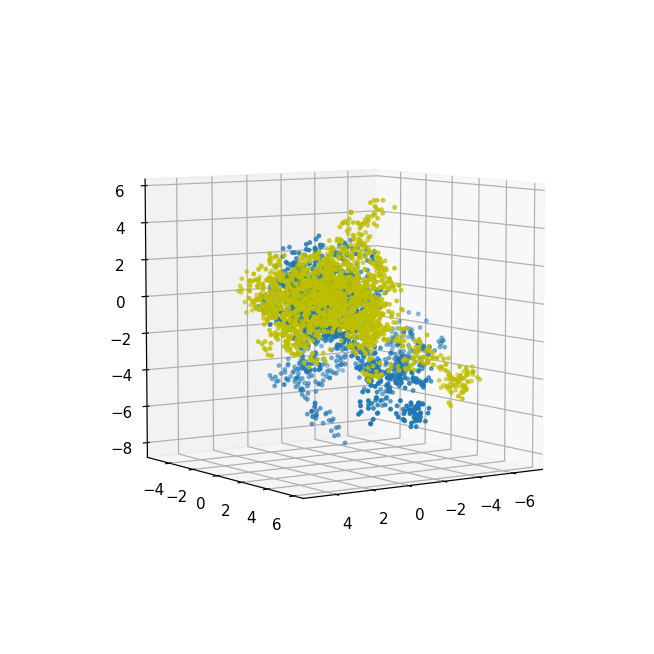

In [26]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)
ax.scatter(x[:,0],x[:,1],x[:,2],marker='.')
ax.scatter(y[:,0],y[:,1],y[:,2],marker='.',color='y')
ax.scatter(0,0,0,marker='o',color='r',s=100)

In [44]:
def potencial(x,y):
    
    if x.any() != 0 and y.any() != 0.:
        return 1/np.sqrt( np.sum( (x-y)**2 ) )
    else:
        return 0.
    
   # return np.linalg.norm(x,y)

In [45]:
print(x[0,:])

[0. 0. 0.]


In [46]:
U = np.zeros(len(x[:,0]))
for i in range(len(x[:,0])):
    U[i] = potencial(x[i,:],y[i,:])

In [47]:
print(U)

[0.         0.         1.29166355 ... 0.13642669 0.1281565  0.13386829]


In [48]:
np.average(U)

0.2807440825967453

In [49]:
def GetD(A,B):
    d = np.sqrt( (A[0]-B[0])**2 + (A[1]-B[1])**2 + (A[2]-B[2])**2   )
    return d